### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()
co_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']

In [3]:
co_df

,invoice,code,description,quantity,date,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# 결측치 확인 
co_df.isnull().sum()
# 확인 결과 -> description에 1454개, 고객 id에 135080개 발견 

invoice             0
code                0
description      1454
quantity            0
date                0
price               0
id             135080
country             0
dtype: int64

In [5]:
# description 컬럼을 제거 
co_df.drop(columns=['description'], inplace=True)
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
# description 결측치 제거 후 확인 결과 
co_df.isnull().sum()

invoice          0
code             0
quantity         0
date             0
price            0
id          135080
country          0
dtype: int64

In [7]:
# 고객 아이디의 개수 확인 -> 406829개 발견 
co_df['id'].value_counts()
# co_df['id'].count()

id
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
co_df[["id"]].describe().T # 고객 id 컬럼에 대한 통계량을 계산 하고 전치 행렬 처리함 

,count,mean,std,min,25%,50%,75%,max
id,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [9]:
# 5270 개의 중복된 행이 있다는 결과가 나옴 
co_df.duplicated().sum() 

5270

In [10]:
# 고객 ID 정보의 수는 매우 많고, 중복된 부분도 많기 때문에 우선 중복된 고객 정보를 지우고 하나로 초기화 하였습니다.
co_df = co_df.drop_duplicates(subset=['id'])
co_df['id'].value_counts()

id
17850.0    1
16050.0    1
14820.0    1
13568.0    1
12450.0    1
          ..
17105.0    1
14438.0    1
12956.0    1
15781.0    1
12713.0    1
Name: count, Length: 4372, dtype: int64

In [11]:
co_df[["id"]].describe().T
 # 데이터 수와 평균,표준편차, 최소,최대값, 사분위 분포도 추출

,count,mean,std,min,25%,50%,75%,max
id,4372.0,15299.677722,1722.390705,12346.0,13812.75,15300.5,16778.25,18287.0


In [12]:
# 최종 결측치 확인 결과 
co_df.isnull().sum()

invoice     0
code        0
quantity    0
date        0
price       0
id          1
country     0
dtype: int64

In [15]:
# 데이터 프레임 데이터수 재확인 
co_df.value_counts()

invoice  code    quantity  date             price  id       country       
536365   85123A   6        12/1/2010 8:26   2.55   17850.0  United Kingdom    1
559993   23344    3        7/14/2011 12:42  2.08   14716.0  United Kingdom    1
560106   22704    25       7/14/2011 20:01  0.42   17554.0  United Kingdom    1
560102   23147    12       7/14/2011 18:28  1.45   13994.0  United Kingdom    1
560086   20725    10       7/14/2011 16:35  1.65   15839.0  United Kingdom    1
                                                                             ..
544449   22567    2        2/20/2011 12:14  1.25   16115.0  United Kingdom    1
544452   85066    2        2/20/2011 12:32  12.75  14162.0  United Kingdom    1
544454   21818    36       2/20/2011 13:13  0.85   13301.0  United Kingdom    1
544456   84817    1        2/20/2011 13:21  2.10   14803.0  United Kingdom    1
C581121  22526   -1        12/7/2011 12:28  12.75  14087.0  United Kingdom    1
Name: count, Length: 4372, dtype: int64

In [24]:
# 무엇을 기준점으로 삼을 것인가 -> 결제 금액을 기준으로 이상치를 제거 할 것이다.
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 10.5


In [25]:
# 우선 수량이 음수인 경우도 있으므로 이를 제거 
co_df = co_df[co_df['quantity'] >= 0]
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
9,536367,84879,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
26,536370,22728,24,12/1/2010 8:45,3.75,12583.0,France
46,536371,22086,80,12/1/2010 9:00,2.55,13748.0,United Kingdom
65,536374,21258,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...
536969,581233,22178,6,12/8/2011 10:33,1.95,13436.0,United Kingdom
537255,581241,22922,12,12/8/2011 10:58,0.85,15520.0,United Kingdom
538064,581385,84029G,24,12/8/2011 13:11,3.75,13298.0,United Kingdom
538812,581416,22466,1,12/8/2011 14:58,1.95,14569.0,United Kingdom


In [26]:
co_df[co_df['price'] > upper_bound] # 우선 이상치는 제거 하지 않기로 함 (데이터 보존을 위해)
# 후에 문제가 생기면 이상치를 제거 할 계획

,invoice,code,quantity,date,price,id,country
65,536374,21258,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
168,536385,22783,1,12/1/2010 9:56,19.95,17420.0,United Kingdom
2366,536586,22846,8,12/1/2010 16:25,14.95,18229.0,United Kingdom
4406,536779,BANK CHARGES,1,12/2/2010 15:08,15.00,15823.0,United Kingdom
4838,536808,22423,1,12/2/2010 16:46,12.75,17659.0,United Kingdom
...,...,...,...,...,...,...,...
488466,577826,23486,1,11/22/2011 9:43,16.65,17600.0,United Kingdom
514243,579690,22485,1,11/30/2011 14:03,12.75,15060.0,United Kingdom
529740,580752,POST,3,12/6/2011 9:56,45.00,12478.0,Greece
530032,580772,22839,1,12/6/2011 11:00,14.95,15992.0,United Kingdom


In [27]:
# 날짜 형식을 년/월/일로 바꿈
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
9,536367,84879,32,2010/12/01,1.69,13047.0,United Kingdom
26,536370,22728,24,2010/12/01,3.75,12583.0,France
46,536371,22086,80,2010/12/01,2.55,13748.0,United Kingdom
65,536374,21258,32,2010/12/01,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...
536969,581233,22178,6,2011/12/08,1.95,13436.0,United Kingdom
537255,581241,22922,12,2011/12/08,0.85,15520.0,United Kingdom
538064,581385,84029G,24,2011/12/08,3.75,13298.0,United Kingdom
538812,581416,22466,1,2011/12/08,1.95,14569.0,United Kingdom


In [28]:
# 'date' 열을 복사하여 새로운 데이터프레임에 할당
co_df_copy = co_df.copy()

# 'date' 열의 값을 일 수로 변환하여 새로운 열에 저장 (최신날짜에서 빼줌으로써, Recency를 구할 때 정확한 값으로 구할 수 있음)
co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


# 결과 확인
print(co_df)
co_df

       invoice    code  quantity  date  price       id         country
0       536365  85123A         6   373   2.55  17850.0  United Kingdom
9       536367   84879        32   373   1.69  13047.0  United Kingdom
26      536370   22728        24   373   3.75  12583.0          France
46      536371   22086        80   373   2.55  13748.0  United Kingdom
65      536374   21258        32   373  10.95  15100.0  United Kingdom
...        ...     ...       ...   ...    ...      ...             ...
536969  581233   22178         6     1   1.95  13436.0  United Kingdom
537255  581241   22922        12     1   0.85  15520.0  United Kingdom
538064  581385  84029G        24     1   3.75  13298.0  United Kingdom
538812  581416   22466         1     1   1.95  14569.0  United Kingdom
541768  581578    POST         3     0  18.00  12713.0         Germany

[4195 rows x 7 columns]


,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,373,2.55,17850.0,United Kingdom
9,536367,84879,32,373,1.69,13047.0,United Kingdom
26,536370,22728,24,373,3.75,12583.0,France
46,536371,22086,80,373,2.55,13748.0,United Kingdom
65,536374,21258,32,373,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...
536969,581233,22178,6,1,1.95,13436.0,United Kingdom
537255,581241,22922,12,1,0.85,15520.0,United Kingdom
538064,581385,84029G,24,1,3.75,13298.0,United Kingdom
538812,581416,22466,1,1,1.95,14569.0,United Kingdom


### date의 값이 클 수록 더 예전에 거래한 내용임을 확인 할 수 있음

In [31]:
# Recency 구하기 
# 날짜의 가장 최소값을 가져옴 (즉 각 id에서 가장 최신 날짜를 불러옴)
rfm_r = co_df.groupby('id')['date'].min().reset_index()
rfm_r.columns = ['id', 'Recency']
rfm_r

,id,Recency
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310
...,...,...
4189,18280.0,277
4190,18281.0,180
4191,18282.0,126
4192,18283.0,337


In [35]:
#Frequency 구하기 
# 중복된 고객 id를 지웠기 때문에, id의 수를 가져오는 것보다 종속변수로 있는 quantity를 빈도수로 가져올 수 있음 
rfm_f = co_df.groupby('id')['quantity'].sum().reset_index()
rfm_f.columns = ['id', 'Frequency']
rfm_f
# 확인 결과 id가 12346인 회원이 굉장히 많은 빈도수를 차지하는 것을 알 수 있으며, VIP 회원이 될 가능성이 매우 높음 

,id,Frequency
0,12346.0,74215
1,12347.0,12
2,12348.0,72
3,12349.0,2
4,12350.0,12
...,...,...
4189,18280.0,3
4190,18281.0,12
4191,18282.0,1
4192,18283.0,1


In [36]:
# # Monetary 구하기 
rfm_m = co_df.groupby('id')['price'].sum().reset_index()
rfm_m.columns = ['id', 'Monetary']
rfm_m
# 그러나 Monetary를 분석한 결과 12346의 id를 가진 회원은 Monetary 부분에서 그리 높지 않은 점수를 볼 수 있다.

,id,Monetary
0,12346.0,1.04
1,12347.0,2.10
2,12348.0,0.55
3,12349.0,7.50
4,12350.0,2.10
...,...,...
4189,18280.0,7.90
4190,18281.0,0.42
4191,18282.0,12.75
4192,18283.0,0.85


In [37]:
# RFM 결과를 rfm이라는 데이터 프레임에  합친다.
rfm = pd.merge(rfm_r, rfm_m, on='id')
rfm = pd.merge(rfm, rfm_f, on='id')
rfm

,id,Recency,Monetary,Frequency
0,12346.0,325,1.04,74215
1,12347.0,367,2.10,12
2,12348.0,358,0.55,72
3,12349.0,18,7.50,2
4,12350.0,310,2.10,12
...,...,...,...,...
4189,18280.0,277,7.90,3
4190,18281.0,180,0.42,12
4191,18282.0,126,12.75,1
4192,18283.0,337,0.85,1


In [38]:
# 정규화 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [39]:
rfm

,id,Recency,Monetary,Frequency
0,12346.0,0.871314,0.000512,1.000000
1,12347.0,0.983914,0.001033,0.000148
2,12348.0,0.959786,0.000271,0.000957
3,12349.0,0.048257,0.003689,0.000013
4,12350.0,0.831099,0.001033,0.000148
...,...,...,...,...
4189,18280.0,0.742627,0.003886,0.000027
4190,18281.0,0.482574,0.000207,0.000148
4191,18282.0,0.337802,0.006271,0.000000
4192,18283.0,0.903485,0.000418,0.000000


In [40]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,id,Recency,Monetary,Frequency
0,12346.0,0.128686,0.000512,1.000000
1,12347.0,0.016086,0.001033,0.000148
2,12348.0,0.040214,0.000271,0.000957
3,12349.0,0.951743,0.003689,0.000013
4,12350.0,0.168901,0.001033,0.000148
...,...,...,...,...
4189,18280.0,0.257373,0.003886,0.000027
4190,18281.0,0.517426,0.000207,0.000148
4191,18282.0,0.662198,0.006271,0.000000
4192,18283.0,0.096515,0.000418,0.000000


In [41]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,id,Recency,Monetary,Frequency,TotalScore
0,12346.0,0.128686,0.000512,1.000000,1.129198
1,12347.0,0.016086,0.001033,0.000148,0.017267
2,12348.0,0.040214,0.000271,0.000957,0.041442
3,12349.0,0.951743,0.003689,0.000013,0.955445
4,12350.0,0.168901,0.001033,0.000148,0.170082
...,...,...,...,...,...
4189,18280.0,0.257373,0.003886,0.000027,0.261285
4190,18281.0,0.517426,0.000207,0.000148,0.517781
4191,18282.0,0.662198,0.006271,0.000000,0.668470
4192,18283.0,0.096515,0.000418,0.000000,0.096933


In [43]:
co_rfm_df = pd.merge(co_df, rfm, on='id')
co_rfm_df

,invoice,code,quantity,date,price,id,country,Recency,Monetary,Frequency,TotalScore
0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.000000,0.001254,0.000067,0.001322
1,536367,84879,32,373,1.69,13047.0,United Kingdom,0.000000,0.000831,0.000418,0.001249
2,536370,22728,24,373,3.75,12583.0,France,0.000000,0.001844,0.000310,0.002154
3,536371,22086,80,373,2.55,13748.0,United Kingdom,0.000000,0.001254,0.001064,0.002319
4,536374,21258,32,373,10.95,15100.0,United Kingdom,0.000000,0.005386,0.000418,0.005804
...,...,...,...,...,...,...,...,...,...,...,...
4189,581233,22178,6,1,1.95,13436.0,United Kingdom,0.997319,0.000959,0.000067,0.998346
4190,581241,22922,12,1,0.85,15520.0,United Kingdom,0.997319,0.000418,0.000148,0.997885
4191,581385,84029G,24,1,3.75,13298.0,United Kingdom,0.997319,0.001844,0.000310,0.999473
4192,581416,22466,1,1,1.95,14569.0,United Kingdom,0.997319,0.000959,0.000000,0.998278


In [44]:
real_df = co_rfm_df.groupby('id')[['invoice','code','quantity','date','price','country','TotalScore']].first().reset_index()
display(real_df)

,id,invoice,code,quantity,date,price,country,TotalScore
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,1.129198
1,12347.0,537626,85116,12,367,2.10,Iceland,0.017267
2,12348.0,539318,84992,72,358,0.55,Finland,0.041442
3,12349.0,577609,23112,2,18,7.50,Italy,0.955445
4,12350.0,543037,21908,12,310,2.10,Norway,0.170082
...,...,...,...,...,...,...,...,...
4189,18280.0,545712,82484,3,277,7.90,United Kingdom,0.261285
4190,18281.0,556464,22037,12,180,0.42,United Kingdom,0.517781
4191,18282.0,562525,21270,1,126,12.75,United Kingdom,0.668470
4192,18283.0,540350,22356,1,337,0.85,United Kingdom,0.096933


In [60]:
# TotalScore의 범위를 정한다.
import numpy as np

l1, l2, l3, l4 = np.percentile(real_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3)

0.09207804955611058 0.25799070339355296 0.6175328108765769


In [61]:
# 각 범위에 따라 레벨을 나눈다.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [62]:
real_df['Level'] = real_df['TotalScore'].apply(get_level)
real_df

,id,invoice,code,quantity,date,price,country,TotalScore,Level
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,1.129198,1
1,12347.0,537626,85116,12,367,2.10,Iceland,0.017267,5
2,12348.0,539318,84992,72,358,0.55,Finland,0.041442,5
3,12349.0,577609,23112,2,18,7.50,Italy,0.955445,1
4,12350.0,543037,21908,12,310,2.10,Norway,0.170082,4
...,...,...,...,...,...,...,...,...,...
4189,18280.0,545712,82484,3,277,7.90,United Kingdom,0.261285,3
4190,18281.0,556464,22037,12,180,0.42,United Kingdom,0.517781,3
4191,18282.0,562525,21270,1,126,12.75,United Kingdom,0.668470,2
4192,18283.0,540350,22356,1,337,0.85,United Kingdom,0.096933,4


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

real_df['Level'] = real_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])
real_df


,id,invoice,code,quantity,date,price,country,TotalScore,Level
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,1.129198,VIP
1,12347.0,537626,85116,12,367,2.10,Iceland,0.017267,Bronze
2,12348.0,539318,84992,72,358,0.55,Finland,0.041442,Bronze
3,12349.0,577609,23112,2,18,7.50,Italy,0.955445,VIP
4,12350.0,543037,21908,12,310,2.10,Norway,0.170082,Sliver
...,...,...,...,...,...,...,...,...,...
4189,18280.0,545712,82484,3,277,7.90,United Kingdom,0.261285,Gold
4190,18281.0,556464,22037,12,180,0.42,United Kingdom,0.517781,Gold
4191,18282.0,562525,21270,1,126,12.75,United Kingdom,0.668470,Diamond
4192,18283.0,540350,22356,1,337,0.85,United Kingdom,0.096933,Sliver


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

print(real_df['Level'].value_counts())

Level
Gold       1258
Bronze      839
Sliver      839
Diamond     838
VIP         420
Name: count, dtype: int64


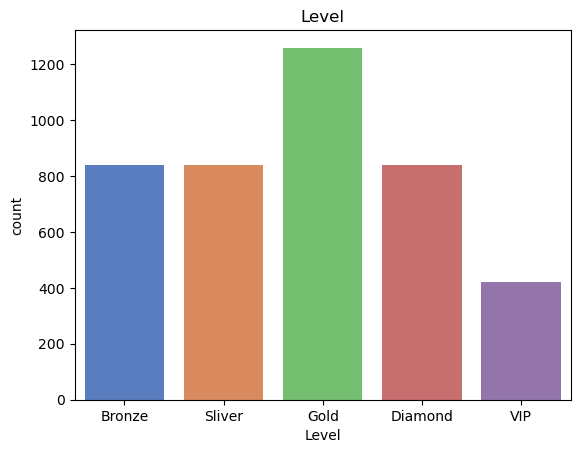

In [139]:
sns.countplot(x='Level', data=real_df, palette='muted', order=order)
plt.title('Level')
plt.show()

### 차트 시각화 자료 분석 결과 
각 회원의 등급을 시각화 자료로 분석한 결과 브론즈, 실버, 다이아몬드의 회원 등급 거의 동일한 수준의 분포를 보이고 있으며,
가장 많은 분포를 가진 회원 등급은 골드 등급의 회원들이고, 가장 하위의 분포를 가진 회원 등급은 VIP 회원들이였습니다.
그러나 각 국가에 따라서 이러한 멤버 등급은 서로 다를 수 있으며, 이 점을 유의하여 국가별로 멤버 등급을 분석하는 것이 더 중요할 것입니다.

### 💡 결론
골드 회원들의 특성 및 구매 패턴, 그리고 VIP 회원들의 혜택 및 서비스에 대한 분석이 필요할 것으로 보입니다. 또한, 이러한 분석을 토대로 VIP 회원들의 수를 늘리고, 골드 등급 회원들을 유지하며 신규 고객을 유치하는 전략을 수립할 필요가 있을 것입니다.





In [127]:
real_df['country'].value_counts()
# 영국의 데이터 수가 압도적으로 많은 것으로 미루어보아 아마 영국 내 기업인 것으로 예상

country
United Kingdom          3791
Germany                   87
France                    85
Spain                     28
Belgium                   24
Switzerland               20
Portugal                  19
Finland                   12
Italy                     12
Norway                    10
Netherlands                9
Channel Islands            9
Austria                    8
Japan                      8
Denmark                    8
Australia                  8
Sweden                     7
Cyprus                     7
Poland                     6
USA                        4
Canada                     4
Greece                     4
Unspecified                4
Israel                     3
United Arab Emirates       2
EIRE                       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech 

In [142]:
price = real_df.groupby('country')['TotalScore'].sum().sort_values(ascending=False)
print(price)
# 국가별 RFM 통계 합산 = 영국,독일,프랑스,스페인,스위스,벨기에,포르투갈,핀란드,이탈리아 ...

country
United Kingdom          1553.063997
Germany                   37.285560
France                    33.923274
Spain                     11.799165
Switzerland                9.290153
Belgium                    8.090405
Portugal                   8.065529
Finland                    7.009096
Italy                      5.561956
Norway                     5.192195
Denmark                    4.124613
Austria                    3.527395
Sweden                     3.513082
USA                        3.069935
Netherlands                2.968720
Japan                      2.901691
Channel Islands            2.887046
Poland                     2.584032
Cyprus                     2.543054
Unspecified                2.031750
Canada                     1.953450
Greece                     1.754998
Israel                     1.732590
Malta                      1.202393
Australia                  1.195878
United Arab Emirates       0.940634
Bahrain                    0.885189
RSA                 

In [141]:
price = real_df.groupby('country')['price'].sum().sort_values(ascending=False)
print(price)

country
United Kingdom          18325.32
France                    479.02
Germany                   343.42
Spain                     158.33
Belgium                    90.40
Italy                      55.94
Norway                     55.00
Sweden                     53.48
Greece                     51.28
Netherlands                51.06
Switzerland                49.58
Portugal                   46.81
Denmark                    42.50
Finland                    40.76
Channel Islands            38.53
Australia                  21.95
Cyprus                     21.29
Poland                     18.24
USA                        15.97
European Community         14.95
Unspecified                14.70
Austria                    13.61
Malta                      13.45
Japan                      12.01
Bahrain                    11.20
Brazil                     10.95
EIRE                       10.80
Israel                     10.05
United Arab Emirates        9.90
Canada                      4.81
Cz

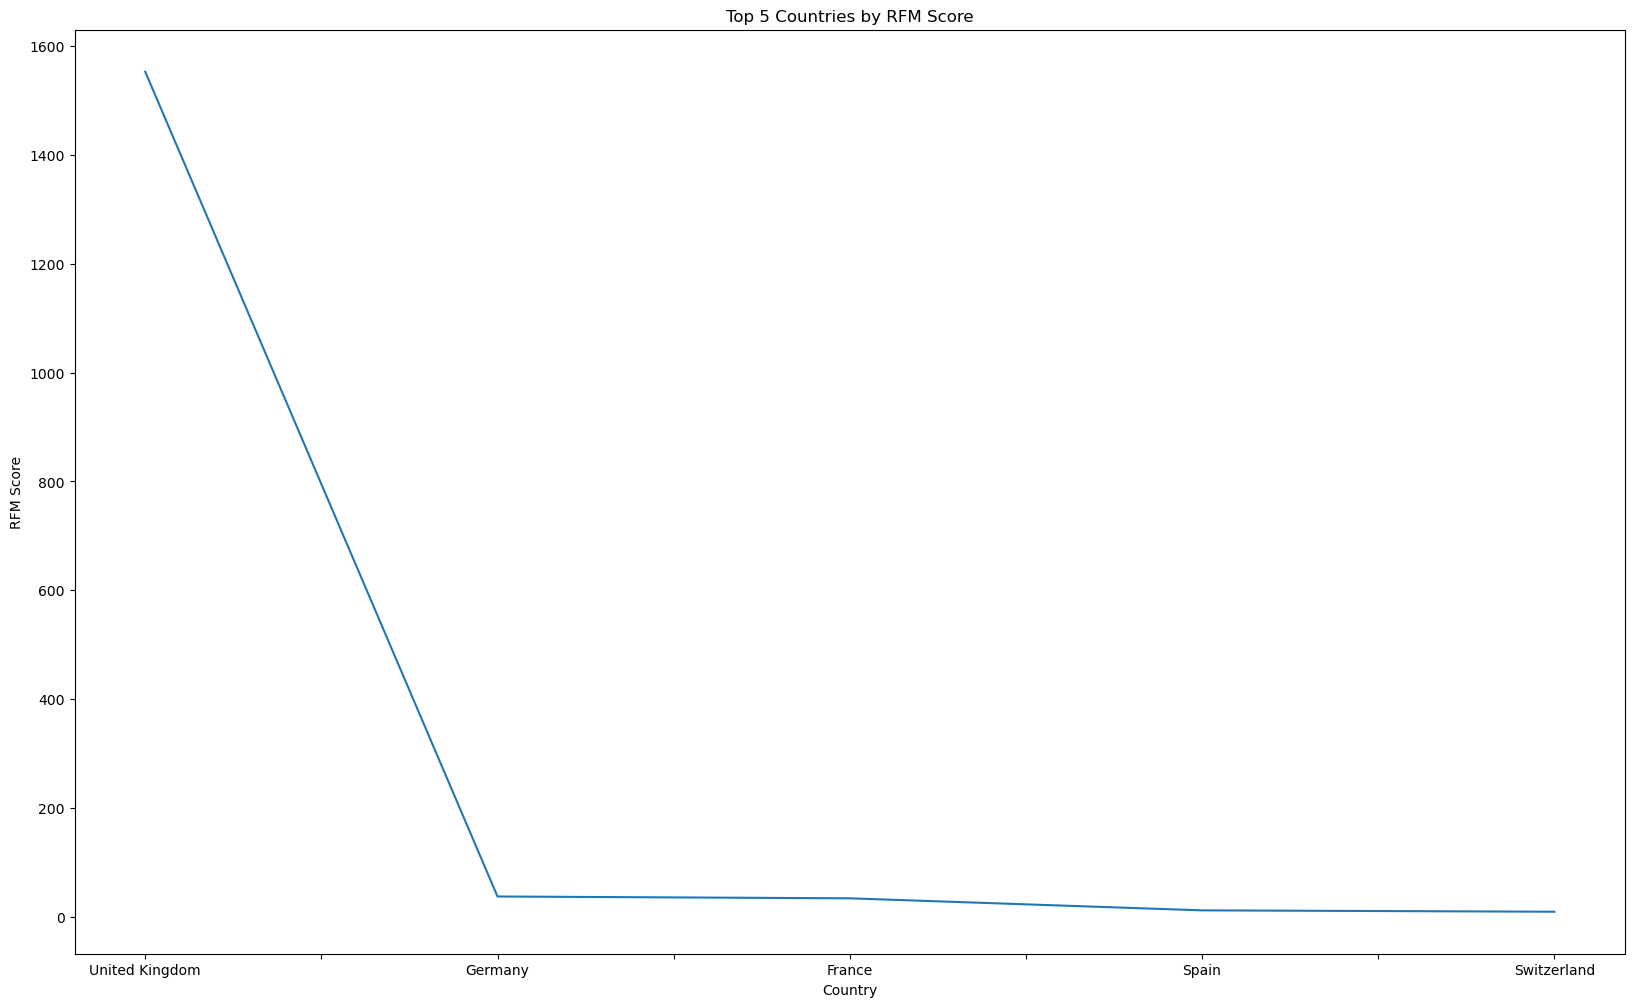

In [151]:
fig, axes = plt.subplots(1, figsize=(20, 12))

# 각 나라별로 RFM 점수를 합산 (상위 5개 국가 추출)
price_by_country = real_df.groupby('country')['TotalScore'].sum().nlargest(5)

# 시각화
price_by_country.plot(kind='line', ax=axes)
axes.set_title('Top 5 Countries by RFM Score')
axes.set_xlabel('Country')
axes.set_ylabel('RFM Score')
plt.show()


총 가격 합산 역시 영국이 압도적으로 많은 것을 확인 할 수 있으며, 그 다음으로 프랑스, 독일, 스페인, 벨기에 순으로 많은 것을 알 수 있습니다.

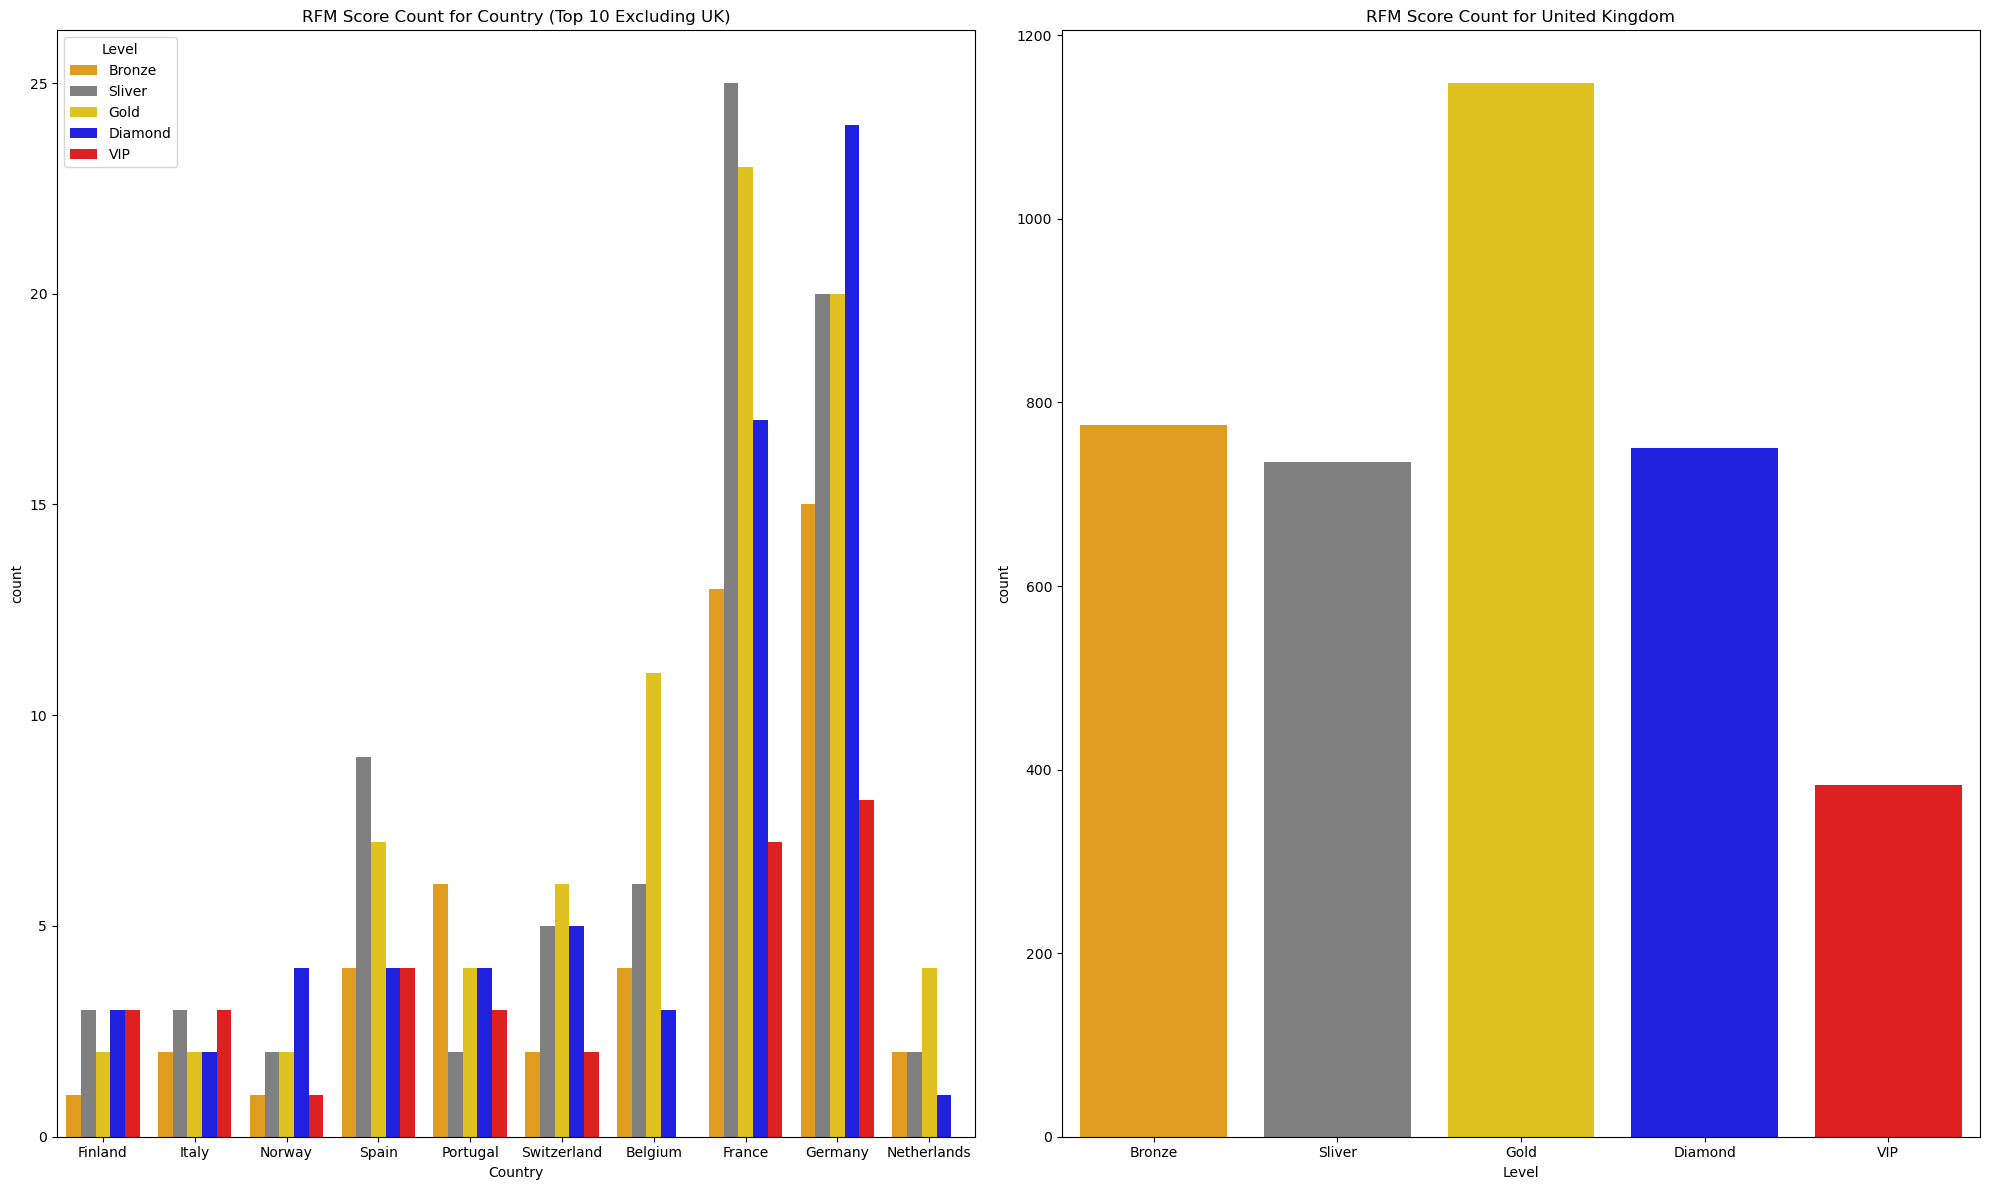

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Bronze': 'orange', 'Sliver': 'gray', 'Gold': 'gold', 'Diamond': 'blue', 'VIP': 'red'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(10).index
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# 인덱스 슬라이싱을 사용하여 영국을 제외한 상위 10개 국가 추출 
top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().index[:10]

# 상위 10개 국가에 해당하는 데이터 필터링
filtered_df = real_df[real_df['country'].isin(top_countries)]

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 왼쪽 그래프: 영국을 제외한 상위 4개 국가에 대한 등급별 RFM 합산 차트 시각화
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
axes[0].set_xlabel('Country')

# 오른쪽 그래프: 영국(United Kingdom)에 대한 등급별 RFM 합산 차트 시각화 
uk_df = real_df[real_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

### 🌏 해외 마케팅 전략
> (영국 내 기업인 것으로 판단하여, 영국을 제외한 상위 10개 국가에 대한 마케팅 전략 분석)

#### <img src="./images/germany.png" width="30px"> 독일 마케팅 전략
- 독일에서는 다이아몬드 등급 회원들이 가장 많은 것으로 나타났으므로, 독일 시장에서는 다이아몬드 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 다이아몬드 등급 회원들은 높은 구매율과 충성도를 보이기 때문에, 특별한 혜택이나 프리미엄 서비스를 제공하여 이탈을 방지하고 브랜드 충성도를 높일 수 있습니다.
- 실버 및 골드 등급 회원도 상당한 수를 차지하고 있으므로, 이들에게도 주의를 기울일 필요가 있습니다.
- 실버 및 골드 등급 회원들에게는 추가 혜택을 제공하여 충성도를 높이고, 골드 및 다이아몬드 등급으로의 등급 업그레이드를 유도하여 수익을 창출 할 수 있습니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 중점을 두어야 합니다.
- 브론즈 및 VIP 등급 회원들을 대상으로 한 특별한 혜택이나 프로모션을 제공하여 등급 업그레이드를 유도할 수 있습니다.

#### <img src="./images/france.png" width="30px"> 프랑스 마케팅 전략
- 가장 많은 회원이 실버 등급이므로, 프랑스 시장에서는 실버 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 실버 등급 회원들에게는 할인 혜택이나 특별한 혜택을 제공하여 충성도를 높일 수 있습니다.
- 골드 및 다이아몬드 등급과 같은 상위 등급의 회원들도 상당수를 차지하고 있으므로, 이들에게 추가 혜택을 제공하여 이탈을 방지하고 충성도를 높일 수 있습니다.
- 특히 이러한 상위 등급의 고객의 경우 기업의 핵심 고객이기 때문에, 프리미엄 서비스나 제품을 홍보하고 이와 같은 마케팅을 프랑스 내의 골드 및 다이아몬드 회원들을 위해 마케팅 전략을 확장하여야 합니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 초점을 맞출 필요가 있습니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 등급 업그레이드를 유도할 수 있습니다.
- VIP 등급 회원들에게는 특별 프로모션을 제공하여 이탈을 방지하고 이전보다 높은 수익을 창출 할 수 있습니다.
  

#### 위의 전략들을 적용하여 상위 2개의 국가 시장에서 브랜드의 인지도를 높이고 고객들의 충성도를 높일 수 있을 것입니다.
- 독일 프랑스 다음으로 RFM 합산 점수가 높았던 국가로는 스페인, 스위스, 벨기에 순이였습니다. 
- 이 3개의 국가들의 경우 각 멤버별 등급이 각기 달랐으며, 이를 통계로 나머지 국가들에 대해서 분석을 하였습니다.

#### <img src="./images/spain.png" width="30px"> 스페인 마케팅 전략
- 스페인의 경우 실버 등급의 회원들이 가장 높은 비중을 차지 하였고, 그 다음으로 골드 등급의 회원들이 높은 비중을 차지하였습니다. 
- 분석 중 신기했던 점은 스페인의 경우 실버, 골드 등급을 제외한 나머지 브론즈,다이아몬드,VIP 회원들의 수가 각각 4명으로 일치하였다는 점이며, 이를 바탕으로 브론즈, 다이아몬드, VIP 등급 회원들에게 높은 서비스 품질과 개인화된 경험을 제공하여 이들의 만족도를 높일 수 있습니다.
- 특히, VIP 등급 회원들에게는 VIP 라운지 이용 혜택이나 특별한 이벤트 초대를 통해 프리미엄 서비스를 제공하여 이들의 충성도를 더욱 높일 수 있습니다.
#### <img src="./images/swice.png" width="30px"> 스위스 마케팅 전략
- 스위스의 경우 골드 등급의 회원들이 가장 많았으며, 골드 등급의 회원들에게는 추가 혜택 및 프로모션을 제공하여 다이아몬드 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야 합니다.
- 실버 등급과 다이아몬드의 회원의 분포가 동일하고, 브론즈 등급과 VIP 회원의 분포가 동일 한 것을 미루어 볼때 실버와 다이아몬드 회원, 그리고 브론즈와 VIP 회원들에게 각기 다른 프로모션을 제공하여 이들의 차별화된 요구에 맞추어 서비스를 제공하는 마케팅 전략을 세워야 합니다.
- 실버와 다이아몬드 회원에게는 제품 또는 서비스에 관한 독점적인 정보나 선착순 이벤트에 대한 정보를 제공하고, 브론즈와 VIP 회원에게는 브랜드와의 관계를 강화하기 위한 특별한 혜택을 제공합니다.

#### <img src="./images/bel.png" width="30px"> 벨기에 마케팅 전략
- 벨기에의 경우 스위스와 마찬가지로 골드 등급의 회원들이 가장 많았으며, 골드 등급의 회원들에게는 추가 혜택 및 프로모션을 제공하여 다이아몬드 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야 합니다.
- 그 다음으로 실버 등급의 회원들에게는 실버 등급 회원들에게는 할인 혜택이나 특별한 혜택을 제공하여 충성도를 높일 수 있습니다.
- 분석결과 VIP 회원의 분포가 아예 없는 것을 볼때, 다이아몬드 회원에 대한 특별 혜택 이벤트와 프로모션을 제공하여 VIP 로의 등급 업그레이드를 유도하여 국가 내 마케팅 전략을 세워야 하겠습니다.


### 결론 
상위 10개 국가 중 가장 높은 RFM 점수를 기록한 독일과 프랑스에 집중적인 마케팅 전략을 펼쳐야 하며, 나머지 국가 들에 대해서도 앞서 분석한 개별 국가에 대한 마케팅 전략을 참고하여 각 국가의 특성과 회원 등급 분포에 맞춰 맞춤형 마케팅 전략을 도입하여야 합니다.

In [154]:
spain_df = real_df[real_df['country'] == 'Spain']
spain_df["Level"].value_counts()
# 스페인의 경우 브론즈와 다이아몬드 등급의 수가 일치한다.

Level
Sliver     9
Gold       7
VIP        4
Diamond    4
Bronze     4
Name: count, dtype: int64

In [158]:
swice_df = real_df[real_df['country'] == 'Belgium']
swice_df["Level"].value_counts()
# 스위스의 경우 VIP 등급이 없다.

Level
Gold       11
Sliver      6
Bronze      4
Diamond     3
Name: count, dtype: int64

### <img src="./images/uk.png" width="30px"> 영국 내 마케팅 전략 
> RFM 분석 결과 가장 많은 비중을 차지한 영국의 경우 골드 등급의 회원들이 가장 많은 것을 확인 할 수 있으며,

> 그 다음으로 브론즈, 다이아몬드, 실버 , VIP 등급 순으로 회원들의 등급이 분포 되있는 것을 확인 할 수 있었습니다.

#### 골드 등급 회원 타겟팅
- 골드 등급 회원이 가장 많은 것으로 나타났으므로, 골드 등급 회원을 중점적으로 타겟으로 삼습니다.
- 골드 등급 회원들은 이미 높은 충성도를 보이는 고객이므로, 추가 혜택을 제공하여 그들의 충성도를 유지하고 이탈을 방지합니다.
- 골드 등급 회원들을 대상으로 한 특별 프로모션, 할인 혜택 등을 제공하여 그들의 만족도를 높이고 추가 구매를 유도합니다.
#### 브론즈 및 다이아몬드, 실버, VIP 등급 회원 타겟팅
- 골드 등급 이외의 회원들에게도 주의를 기울이며, 각 등급에 맞는 특별한 혜택을 제공합니다.
- 브론즈 등급 회원에게는 등급 업그레이드를 유도하는 혜택을 제공하여 충성도를 높입니다.
- VIP 등급 회원들에게는 VIP 서비스, 이벤트 초대 등 고급 서비스를 제공하여 수익성을 향상시킵니다.
- 다이아몬드 등급 회원들에게는 VIP 등급으로의 업그레이드를 유도하여 특별 프로모션을 제공하거나 할인 혜택을 제공합니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 이탈을 방지하고, 이들을 늘리는 데에 중점을 두어야 합니다.
#### 결론 
각 등급의 회원들에게 위와 같은 맞춤형 마케팅 캠페인을 실행하고, 이러한 전략을 통해 영국 내 고객들의 충성도를 높이고 매출을 증가시킬 수 있습니다.